In [880]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
#pd.set_option("precision",4)

# Market Data for US

In [881]:
df_CRSP_market_daily=pd.read_csv('../data/CRSP/CRSP Daily Index Built on Market Capitalization.csv',\
index_col=0,parse_dates=True)

In [882]:
df_CRSP_market_daily =df_CRSP_market_daily[['vwretd']]['2001-01-01':'2020-12-31']

In [883]:
df_AQR_risk_free_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='RF',header=18,index_col=0,parse_dates=True)
df_AQR_risk_free_daily= df_AQR_risk_free_daily['2001-01-01':'2020-12-31']

In [892]:
df_AQR_MKT_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='MKT',header=18,index_col=0,parse_dates=True)
df_AQR_MKT_daily= df_AQR_MKT_daily['2001-01-01':'2020-12-31']

In [893]:
df_FF_5=pd.read_csv('../data/FF_Factors/F-F_Research_Data_5_Factors_2x3_daily.csv',index_col=0,parse_dates=True)
df_FF_5 = df_FF_5['2001-01-01':'2020-12-31']/100

In [894]:
df_FF_5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2001-01-02,-0.0352,0.0039,0.0165,0.0158,0.0161,0.00026
2001-01-03,0.0539,-0.0065,-0.0439,-0.0266,-0.0594,0.00026
2001-01-04,-0.0130,0.0097,-0.0030,0.0052,-0.0080,0.00026
2001-01-05,-0.0298,0.0071,0.0238,0.0190,0.0231,0.00026
2001-01-08,-0.0036,-0.0043,0.0126,0.0098,0.0067,0.00026
...,...,...,...,...,...,...
2020-12-24,0.0021,-0.0043,-0.0017,0.0024,-0.0005,0.00000
2020-12-28,0.0046,-0.0065,0.0032,0.0146,0.0050,0.00000
2020-12-29,-0.0040,-0.0142,0.0024,0.0075,-0.0028,0.00000


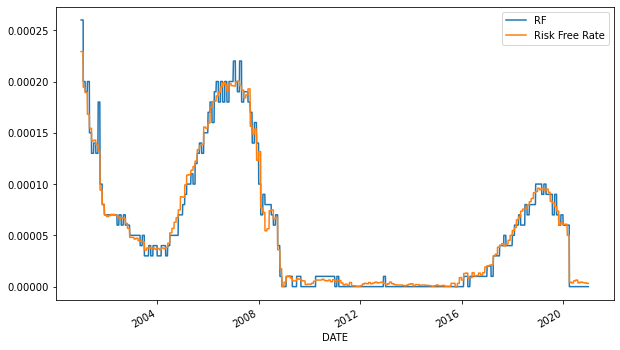

In [895]:
fig, ax =plt.subplots(figsize=(10,6))

df_FF_5.RF.plot(ax=ax)
(df_AQR_risk_free_daily).plot(ax=ax)

plt.legend()

In [896]:
dfs_market_merged=[df_FF_5[['Mkt-RF']],df_CRSP_market_daily[['vwretd']],df_AQR_MKT_daily[['USA']]]
dfs_market_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs_market_merged)

<AxesSubplot:>

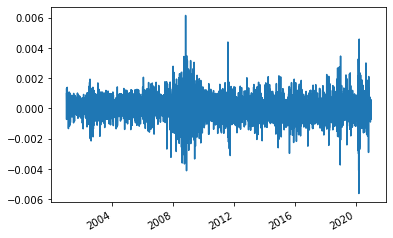

In [897]:
(dfs_market_merged['vwretd']-dfs_market_merged['Mkt-RF']).plot()

In [898]:
dfs_market_merged

,Mkt-RF,vwretd,USA
2001-01-02,-0.0352,-0.034230,-0.034543
2001-01-03,0.0539,0.053170,0.053313
2001-01-04,-0.0130,-0.011674,-0.010935
2001-01-05,-0.0298,-0.028909,-0.028499
2001-01-08,-0.0036,-0.003410,-0.003914
...,...,...,...
2020-12-24,0.0021,0.002332,0.002347
2020-12-28,0.0046,0.003870,0.003893
2020-12-29,-0.0040,-0.003649,-0.003812
2020-12-30,0.0027,0.003281,0.003364


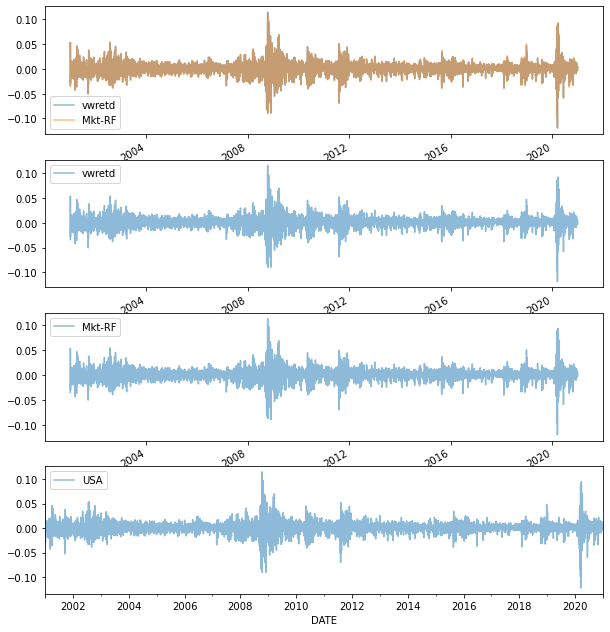

In [899]:
fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(10,12))

(df_CRSP_market_daily.vwretd).plot(ax=ax[0],alpha=0.5)
df_FF_5['Mkt-RF'].plot(ax=ax[0],alpha=0.5)

(df_CRSP_market_daily.vwretd).plot(ax=ax[1],alpha=0.5)

df_FF_5['Mkt-RF'].plot(ax=ax[2],alpha=0.5)

df_AQR_MKT_daily['USA'].plot(ax=ax[3],alpha=0.5)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# Construct the Table 3

In [974]:
def get_alpha(df, factors,portfolio):
    x = df[factors].copy()
    x = sm.add_constant(x)
    results = sm.OLS(df_Port_FF5[portfolio], x).fit(cov_type='HC1')
    return results.params[0],results.params[1],results.tvalues[0]

In [975]:
df_betas=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/beta.pickle')
df_returns=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/return.pickle')
df_betas = df_betas.astype('float64')
df_returns = df_returns.astype('float64')

<AxesSubplot:>

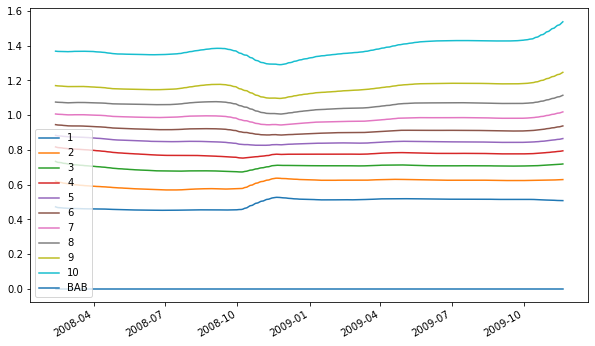

In [976]:
df_betas.rolling(30).mean().plot(figsize=(10,6))

<AxesSubplot:>

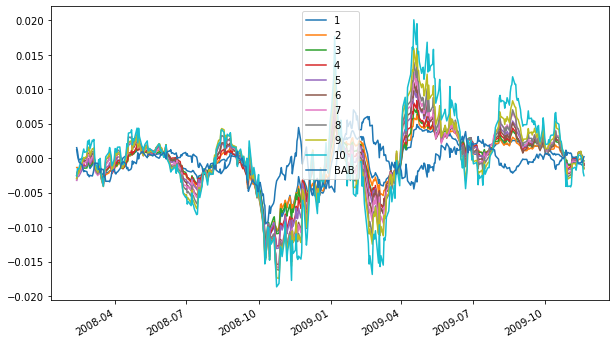

In [977]:
df_returns.rolling(30).mean().plot(figsize=(10,6))

In [978]:
df_table_3=pd.DataFrame(index=['Excess Return','CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha','Beta(ex ante)','Beta(realized)','Volatility','Sharpe Ratio'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [979]:
df_table_4=pd.DataFrame(index=['CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [980]:
df_Port_FF5=df_returns.merge(df_FF_5,left_index=True,right_index=True)
df_Port_FF5 = df_Port_FF5.dropna()

In [981]:
df_Port_FF5 = df_Port_FF5['2009-01-01':'2014-01-01']

In [982]:
df_Port_FF5.index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2009-11-09', '2009-11-10', '2009-11-11', '2009-11-12',
               '2009-11-13', '2009-11-16', '2009-11-17', '2009-11-18',
               '2009-11-19', '2009-11-20'],
              dtype='datetime64[ns]', length=225, freq=None)

In [983]:
df_Port_FF5

,1,2,3,4,5,6,7,8,9,10,BAB,Mkt-RF,SMB,HML,RMW,CMA,RF
2009-01-02,0.027545,0.023646,0.023103,0.028013,0.034537,0.030394,0.025675,0.028508,0.038805,0.042193,0.010155,0.0311,-0.0136,-0.0042,-0.0020,-0.0015,0.0
2009-01-05,0.016488,0.013279,0.007245,0.008639,0.007574,0.004934,0.005089,0.011262,0.013678,0.020106,0.007909,-0.0028,0.0036,-0.0115,-0.0037,-0.0055,0.0
2009-01-06,0.018553,0.019232,0.016392,0.017807,0.027616,0.024362,0.028865,0.031070,0.036421,0.056896,-0.006464,0.0087,0.0113,0.0087,-0.0048,-0.0012,0.0
2009-01-07,-0.004602,-0.009844,-0.012357,-0.021955,-0.029134,-0.028901,-0.033004,-0.039683,-0.042392,-0.051773,0.020882,-0.0296,-0.0001,-0.0115,0.0025,0.0011,0.0
2009-01-08,0.012118,0.008444,0.007053,0.005531,0.008697,0.010400,0.009596,0.010335,0.010326,0.020821,0.002354,0.0047,0.0066,0.0042,-0.0031,0.0066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-11-16,0.002052,0.010792,0.013583,0.012278,0.015810,0.018478,0.019529,0.024841,0.029376,0.028623,-0.006659,0.0154,0.0130,0.0020,0.0029,0.0037,0.0
2009-11-17,-0.001356,-0.002378,-0.002346,-0.002806,0.000631,-0.000871,-0.001280,-0.001815,-0.001128,-0.001253,-0.001807,0.0014,-0.0024,-0.0006,-0.0005,-0.0018,0.0
2009-11-18,0.001872,-0.002203,-0.001453,-0.003408,-0.002247,-0.004484,-0.005122,-0.003663,-0.001023,-0.000476,0.000353,-0.0013,-0.0042,0.0046,-0.0034,0.0005,0.0
2009-11-19,-0.003767,-0.009158,-0.012151,-0.014338,-0.015254,-0.018155,-0.020616,-0.021340,-0.023683,-0.027795,0.004640,-0.0139,-0.0089,-0.0059,0.0011,-0.0010,0.0


In [984]:
columns = np.concatenate((np.arange(1,11,1), ['BAB'])).astype(str)

df_table_3.loc[df_table_3.index=='Excess Return',:]=\
((((1+df_Port_FF5).cumprod().iloc[-1,:11])**(252/len(df_Port_FF5))-1)*100).values/12

df_table_3.loc[df_table_3.index=='CAPM alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Three-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Four-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Five-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Beta(ex ante)',:]=\
df_betas.mean().values

df_table_3.loc[df_table_3.index=='Beta(realized)',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[1] for i in columns]

df_table_3.loc[df_table_3.index=='Volatility',:]=\
[df_Port_FF5[i].std()*np.sqrt(252)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Sharpe Ratio',:]=\
(df_table_3.loc['Excess Return']*12/df_table_3.loc['Volatility'])[:].values

In [985]:
df_table_3

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
Excess Return,2.68361,2.69337,2.83778,2.75798,3.25074,2.26985,2.41367,1.91653,2.53481,2.85244,1.13483
CAPM alpha,1.86639,1.41129,1.13416,0.799523,0.860589,-0.196948,-0.325941,-1.02525,-0.776589,-1.00767,3.05268
Three-factor alpha,1.85868,1.31725,1.04361,0.686857,0.836502,-0.150789,-0.112504,-0.672096,-0.265377,-0.015686,2.46012
Four-factor alpha,1.86208,1.3246,1.05124,0.697145,0.845935,-0.144743,-0.108795,-0.672353,-0.264327,-0.0103395,2.46713
Five-factor alpha,1.86366,1.325,1.05127,0.697985,0.846914,-0.142316,-0.106607,-0.669023,-0.259293,-0.00451454,2.46414
Beta(ex ante),0.492532,0.610269,0.703077,0.779875,0.848891,0.914379,0.983438,1.06155,1.16335,1.38539,0
Beta(realized),0.249283,0.453482,0.637639,0.774523,0.944503,1.10715,1.25959,1.45366,1.64978,2.12688,-0.686495
Volatility,10.7041,14.8885,19.4805,23.2166,27.9566,32.5897,37.0155,42.7596,48.4315,62.9879,22.746
Sharpe Ratio,3.0085,2.17083,1.74807,1.42552,1.39534,0.835791,0.782483,0.537852,0.628057,0.543426,0.598698


In [986]:
df_table_4.loc[df_table_4.index=='CAPM alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Three-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Four-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Five-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[2] for i in columns]


In [987]:
df_table_4

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
CAPM alpha,2.48265,2.029,1.7573,1.22647,1.28866,-0.278295,-0.420648,-1.12246,-0.780475,-0.673604,2.80844
Three-factor alpha,2.47528,2.04135,1.84469,1.23434,1.63646,-0.333964,-0.23548,-1.25014,-0.402039,-0.014435,2.6444
Four-factor alpha,2.47571,2.06012,1.87098,1.27139,1.67665,-0.321476,-0.227289,-1.24663,-0.39911,-0.00948243,2.65454
Five-factor alpha,2.4983,2.06046,1.86706,1.27916,1.68945,-0.329074,-0.229493,-1.30586,-0.425131,-0.00429522,2.65899
